In [ ]:
%pip install faostat meteostat


faostat : Accès direct aux jeux de données agricoles mondiaux de la FAO.

pandas, numpy : Manipulation et analyse de données.

StandardScaler : Normalisation des variables pour faciliter l'apprentissage du modèle.

train_test_split : Séparation des données en jeu d'entraînement et de test.

matplotlib.pyplot : Visualisation des résultats.

tensorflow.keras : Création du modèle de deep learning (LSTM, Conv1D, Dense).

In [ ]:
import faostat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from meteostat import Point, Daily
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, concatenate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime


 Collecte des données de rendement Riz 2010-**2024**

liste de tous les jeux de données disponibles sur FAOstat, pour choisir le dataset pertinent

In [ ]:
faostat.list_datasets_df()

,code,label,date_update,note_update,release_current,state_current,year_current,release_next,state_next,year_next
0,QCL,Crops and livestock products,2025-02-27,minor revision,2024-12-20 / 2025-02-27,final,2023,2025-12,final,2024
1,QI,Production Indices,2025-02-03,,2025-02-03,final,2023,2025-12,final,2024
2,QV,Value of Agricultural Production,2025-02-03,,2025-02-03,final,2023,2025-12,final,2024
3,FS,Suite of Food Security Indicators,2025-03-27,minor revision,2024-07-24 / 2025-03-27,final,2023,2025-07,final,2024
4,FBS,Food Balances (2010-),2024-07-19,,2024-07-19,final,2022,2025-07,final,2023
...,...,...,...,...,...,...,...,...,...,...
63,FA,Food Aid Shipments (WFP),2016-12-22,,2016-12-22,preliminary,2016,,,
64,RM,Machinery,2021-12-03,minor revision,2011-12-22 / 2021-12-03,final,2009,,,
65,RY,Machinery Archive,2021-12-03,minor revision,2006-12-31 / 2021-12-03,final,2005,,,
66,RA,Fertilizers archive,2020-09-08,minor revision,2013-12-31 / 2020-09-08,final,2002,,,


Vérification les paramètres d'un ensemble de données donné

In [ ]:
faostat.list_pars_df('QV')

Pour récupérer les valeurs disponibles d'un paramètre pour un jeu de données donné :


In [ ]:
faostat.get_par_df('QV', 'area').head(30)

In [ ]:
items = faostat.get_par('QV', 'item')
print(items)

{'Abaca, manila hemp, raw': '809', 'Agave fibres, raw, n.e.c.': '800', 'Almonds, in shell': '221', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw': '711', 'Apples': '515', 'Apricots': '526', 'Areca nuts': '226', 'Artichokes': '366', 'Asparagus': '367', 'Avocados': '572', 'Balata, gutta-percha, guayule, chicle and similar natural gums in primary forms or in plates, sheets or strip': '839', 'Bambara beans, dry': '203', 'Bananas': '486', 'Barley': '44', 'Beans, dry': '176', 'Beeswax': '1183', 'Blueberries': '552', 'Brazil nuts, in shell': '216', 'Broad beans and horse beans, dry': '181', 'Broad beans and horse beans, green': '420', 'Buckwheat': '89', 'Buffalo fat, unrendered': '949', 'Cabbages': '358', 'Canary seed': '101', 'Cantaloupes and other melons': '568', 'Carrots and turnips': '426', 'Cashew nuts, in shell': '217', 'Cashewapple': '591', 'Cassava, fresh': '125', 'Castor oil seeds': '265', 'Cattle fat, unrendered': '869', 'Cauliflowers and broccoli': '393

In [ ]:
elements = faostat.get_par('QV', 'element')
print(elements)

{'Gross Production Value (constant 2014-2016 thousand I$)': '152', 'Gross Production Value (current thousand SLC)': '56', 'Gross Production Value (constant 2014-2016 thousand SLC)': '55', 'Gross Production Value (current thousand US$)': '57', 'Gross Production Value (constant 2014-2016 thousand US$)': '58'}


Collecte des données de rendement (riz 2010-2024)

In [ ]:
mypars = {'area': '53',
              'element': [55,56,57,58,152],
              'item': '27',
              'year': list(range(2010, 2024))}

df = faostat.get_data_df('QV', pars=mypars)

In [ ]:
df

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QV,Value of Agricultural Production,53,Benin,152,Gross Production Value (constant 2014-2016 tho...,27,Rice,2010,2010,1000 Int$,48874
1,QV,Value of Agricultural Production,53,Benin,152,Gross Production Value (constant 2014-2016 tho...,27,Rice,2011,2011,1000 Int$,85889
2,QV,Value of Agricultural Production,53,Benin,152,Gross Production Value (constant 2014-2016 tho...,27,Rice,2012,2012,1000 Int$,84723
3,QV,Value of Agricultural Production,53,Benin,152,Gross Production Value (constant 2014-2016 tho...,27,Rice,2013,2013,1000 Int$,141798
4,QV,Value of Agricultural Production,53,Benin,152,Gross Production Value (constant 2014-2016 tho...,27,Rice,2014,2014,1000 Int$,91567
...,...,...,...,...,...,...,...,...,...,...,...,...
57,QV,Value of Agricultural Production,53,Benin,58,Gross Production Value (constant 2014-2016 tho...,27,Rice,2019,2019,1000 USD,267160
58,QV,Value of Agricultural Production,53,Benin,58,Gross Production Value (constant 2014-2016 tho...,27,Rice,2020,2020,1000 USD,270775
59,QV,Value of Agricultural Production,53,Benin,58,Gross Production Value (constant 2014-2016 tho...,27,Rice,2021,2021,1000 USD,341886
60,QV,Value of Agricultural Production,53,Benin,58,Gross Production Value (constant 2014-2016 tho...,27,Rice,2022,2022,1000 USD,345404


In [ ]:
df = df[['Year', 'Value']].rename(columns={'Value': 'Rendement'})


In [ ]:
df

In [ ]:
location = Point(6.3703, 2.3912, 5)
start = datetime(2010, 1, 1)
end = datetime(2023, 12, 31)

data = Daily(location, start, end)
data = data.fetch()

In [ ]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2010-01-01,28.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,28.3,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,28.3,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,29.0,25.8,32.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,29.1,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-26,27.1,21.3,32.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27,28.4,24.5,33.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,28.8,25.0,33.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def get_climate_data():
    import pandas as pd
    import numpy as np
    years = list(range(2010, 2024))
    np.random.seed(42)
    temp = np.random.normal(loc=27, scale=2, size=len(years))
    precip = np.random.normal(loc=1200, scale=300, size=len(years))
    df_clim = pd.DataFrame({'Year': years, 'Temp': temp, 'Precip': precip})
    return df_clim


In [ ]:
df_clim = get_climate_data()
df_clim.columns.tolist()
df['Year'] = df['Year'].astype(int)
df['Rendement'] = df['Rendement'].astype(int)
df_clim['Year'] = df_clim['Year'].astype(int)
df_fusionne = df.merge(df_clim, on='Year')



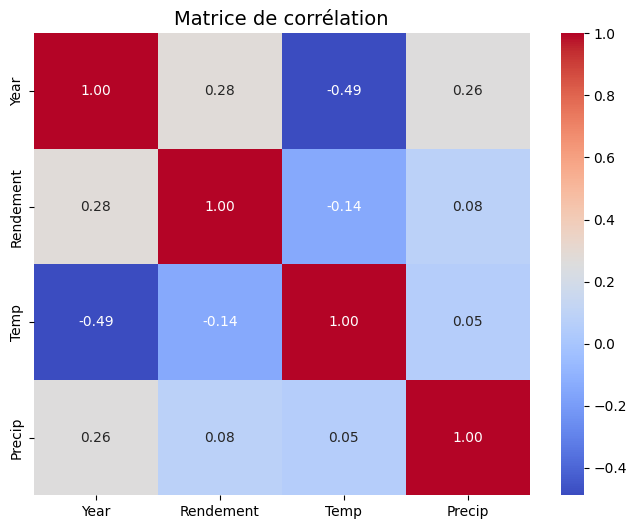

In [ ]:
# Matrice de corrélation
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df_fusionne.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation", fontsize=14)
plt.show()

In [ ]:
df_fusionne.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution de toutes les variables numériques")
plt.show()

Prétraitement des données

In [ ]:
features = ['Temp', 'Precip']
target = 'Rendement'

X = df_fusionne[features].values
y = df_fusionne[target].values.reshape(-1, 1)

Normalisation des données

In [ ]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)


La fonction create_sequences sert à transformer des données tabulaires classiques en séquences temporelles adaptées aux réseaux de neurones récurrents (comme LSTM ou GRU), qui sont spécialisés dans le traitement des séries temporelles

In [ ]:
def create_sequences(X, y, n_steps=3):
    X_seq, y_seq = [], []
    for i in range(len(X) - n_steps):
        X_seq.append(X[i:i+n_steps])
        y_seq.append(y[i+n_steps])
    return np.array(X_seq), np.array(y_seq)

n_steps = 3
X_seq, y_seq = create_sequences(X_scaled, y_scaled, n_steps)

print("Shape X_seq:", X_seq)
print("Shape y_seq:", y_seq)


Shape X_seq: [[[ 0.45443299 -1.48719429]
  [-0.26694312 -0.14418055]
  [ 0.62594953 -0.6646265 ]]

 [[-0.26694312 -0.14418055]
  [ 0.62594953 -0.6646265 ]
  [ 1.62039321  0.86834971]]

 [[ 0.62594953 -0.6646265 ]
  [ 1.62039321  0.86834971]
  [-0.37587923 -0.54355852]]

 [[ 1.62039321  0.86834971]
  [-0.37587923 -0.54355852]
  [-0.37586058 -1.12607772]]

 [[-0.37587923 -0.54355852]
  [-0.37586058 -1.12607772]
  [ 1.68422064  2.19839241]]

 [[-0.37586058 -1.12607772]
  [ 1.68422064  2.19839241]
  [ 0.76198886  0.24454078]]

 [[ 1.68422064  2.19839241]
  [ 0.76198886  0.24454078]
  [-0.64321894  0.58335182]]

 [[ 0.76198886  0.24454078]
  [-0.64321894  0.58335182]
  [ 0.50651685 -1.14045298]]

 [[-0.64321894  0.58335182]
  [ 0.50651685 -1.14045298]
  [-0.63633815 -0.12349779]]

 [[ 0.50651685 -1.14045298]
  [-0.63633815 -0.12349779]
  [-0.6389648   0.6334789 ]]

 [[-0.63633815 -0.12349779]
  [-0.6389648   0.6334789 ]
  [ 0.16501857 -0.82422502]]

 [[-0.6389648   0.6334789 ]
  [ 0.1650185

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape)


(49, 2) (13, 2)


LSTM : Réseaux adaptés aux séries temporelles (données dépendantes du temps, comme la météo, les rendements annuels).

Conv1D : Capte des motifs locaux dans les séquences temporelles (par exemple, des tendances climatiques sur plusieurs années).

Dense : Couches classiques pour la prédiction finale.

concatenate : Permet de fusionner plusieurs flux de données (par exemple, météo + maladies + type de culture).

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 2), dtype=float32). Expected shape (None, 3, 2), but input has incompatible shape (None, 2)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • training=True
  • mask=None

Visualiser la courbe de perte (loss) permet de vérifier que le modèle apprend correctement.


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

plt.plot(y_test, label='Rendement réel')
plt.plot(y_pred, label='Rendement prédit')
plt.xlabel('Échantillons')
plt.ylabel('Rendement')
plt.legend()
plt.show()


Évaluation sur le jeu de test

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE :", rmse)
print("R2 :", r2)